In [11]:
import pandas as pd
from iexfinance.stocks import Stock
from datetime import datetime
import matplotlib.pyplot as plt
from iexfinance.stocks import get_historical_data

import os
os.environ['IEX_TOKEN']='sk_00f068d849014098a20d7bd01a00b60a'

In [24]:
start = datetime(2017, 1, 1)
end = datetime(2021, 6, 21)
df = get_historical_data("DIS", start, end, output_format='pandas')

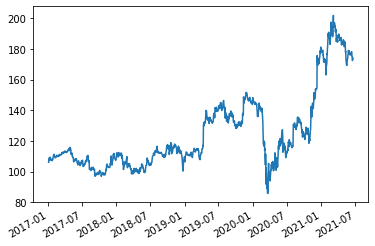

In [25]:
df['close'].plot()

Text(0.5, 1.0, 'DIS Stock Price 1/1/17 - 8/1/19')

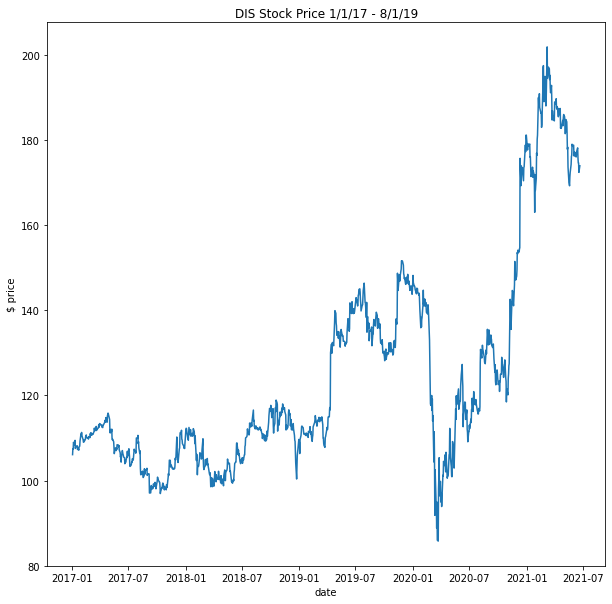

In [26]:
plt.figure(figsize=(10,10))
plt.plot(df.index, df['close'])
plt.xlabel("date")
plt.ylabel("$ price")
plt.title("DIS Stock Price 1/1/17 - 8/1/19")

In [27]:
df["SMA1"] = df['close'].rolling(window=50).mean()
df["SMA2"] = df['close'].rolling(window=200).mean()

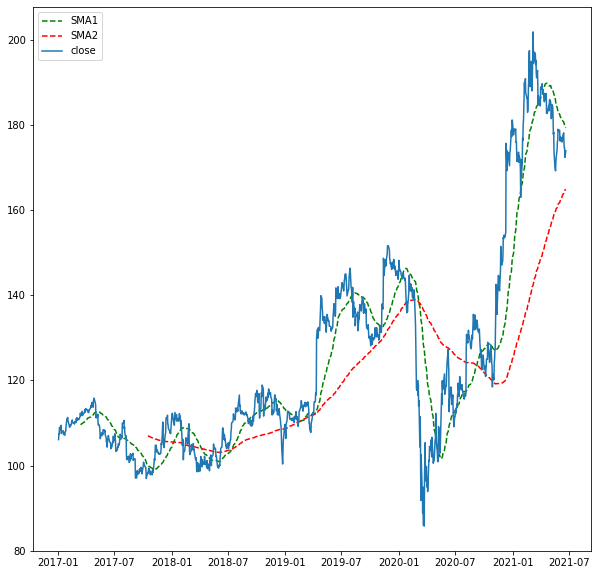

In [28]:
plt.figure(figsize=(10,10))
plt.plot(df['SMA1'], 'g--', label="SMA1")
plt.plot(df['SMA2'], 'r--', label="SMA2")
plt.plot(df['close'], label="close")
plt.legend()
plt.show()

In [29]:
df['ewma'] = df['close'].ewm(halflife=0.5, min_periods=20).mean()

In [30]:
df['middle_band'] = df['close'].rolling(window=20).mean()
df['upper_band'] = df['close'].rolling(window=20).mean() + df['close'].rolling(window=20).std()*2
df['lower_band'] = df['close'].rolling(window=20).mean() - df['close'].rolling(window=20).std()*2

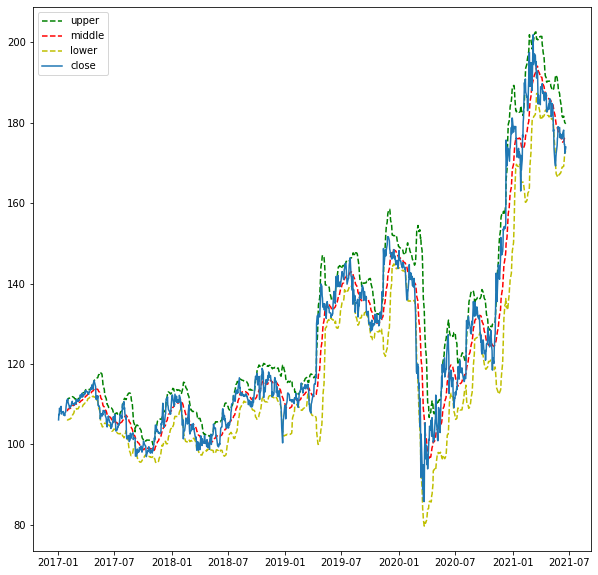

In [31]:
plt.figure(figsize=(10,10))
plt.plot(df['upper_band'], 'g--', label="upper")
plt.plot(df['middle_band'], 'r--', label="middle")
plt.plot(df['lower_band'], 'y--', label="lower")
plt.plot(df['close'], label="close")
plt.legend()
plt.show()

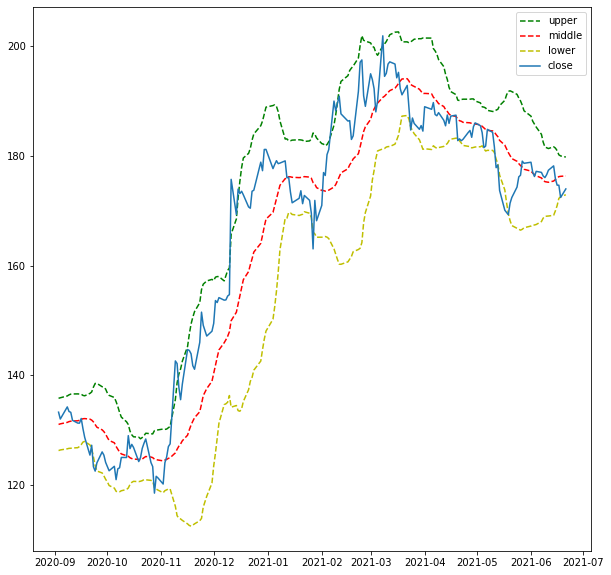

In [32]:
plt.figure(figsize=(10,10))
plt.plot(df['upper_band'].iloc[-200:], 'g--', label="upper")
plt.plot(df['middle_band'].iloc[-200:], 'r--', label="middle")
plt.plot(df['lower_band'].iloc[-200:], 'y--', label="lower")
plt.plot(df['close'].iloc[-200:], label="close")
plt.legend()
plt.show()